# Titanic Dataset - Exploratory Data Analysis (EDA)
This notebook explores the Titanic dataset to understand key factors that affected passenger survival.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("C:/Users/LENOVO/Downloads/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [29]:
corr_matrix = df.select_dtypes(include = 'number').corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [86]:
dff = df.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis=1)

**Univariate analysis**

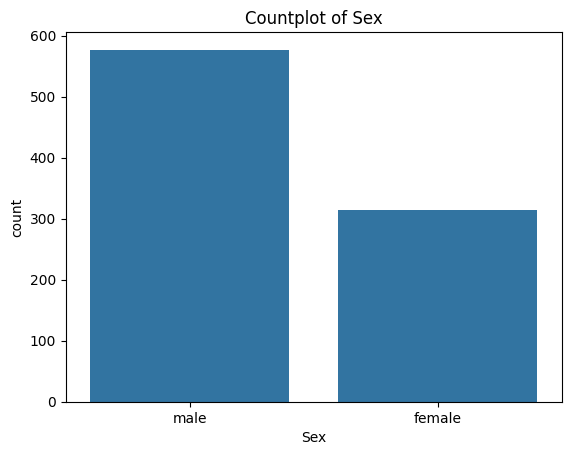

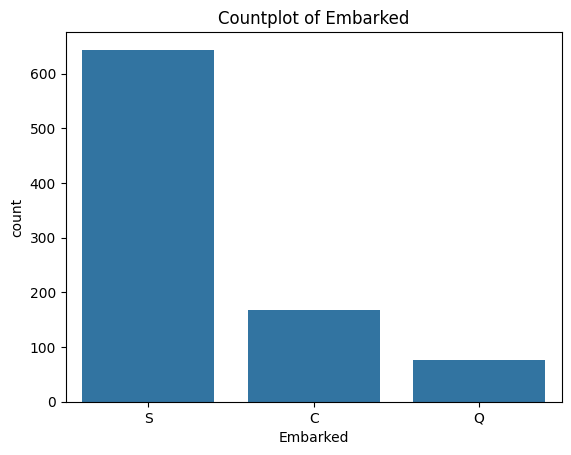

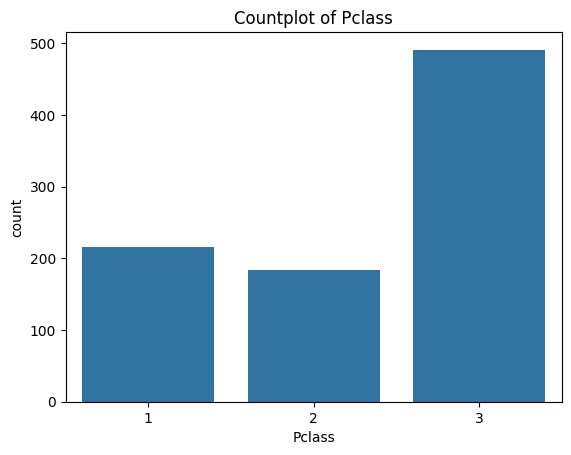

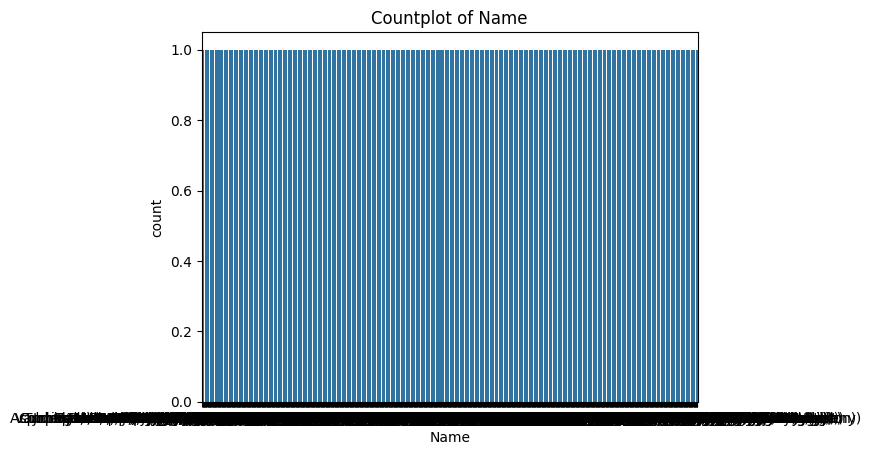

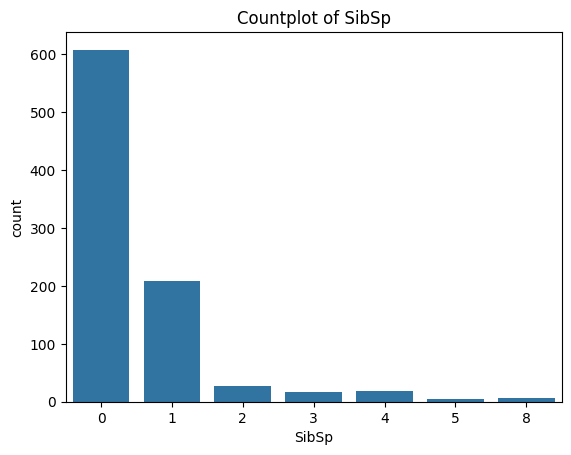

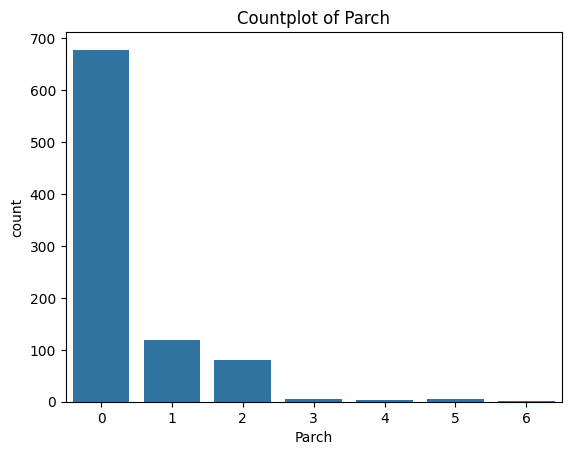

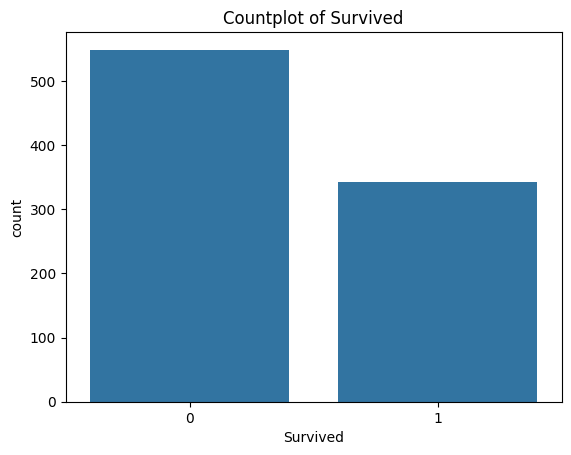

In [21]:
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'Name', 'SibSp', 'Parch', 'Survived']
for col in categorical_cols:
    sns.countplot(x=col, data=dff)
    plt.title(f'Countplot of {col}')
    plt.show()

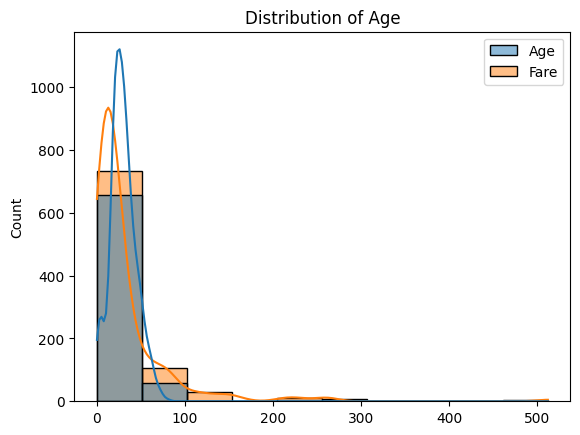

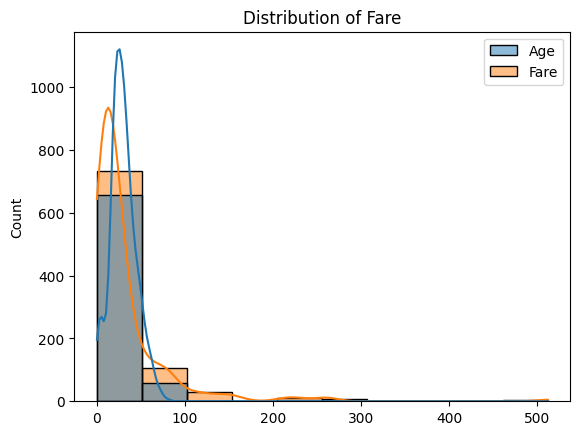

In [53]:
numerical_cols = ['Age', 'Fare']
for col in numerical_cols:
    sns.histplot(dff[numerical_cols], kde = True, bins =10)
    plt.title(f'Distribution of {col}')
    plt.show()

<Axes: ylabel='Fare'>

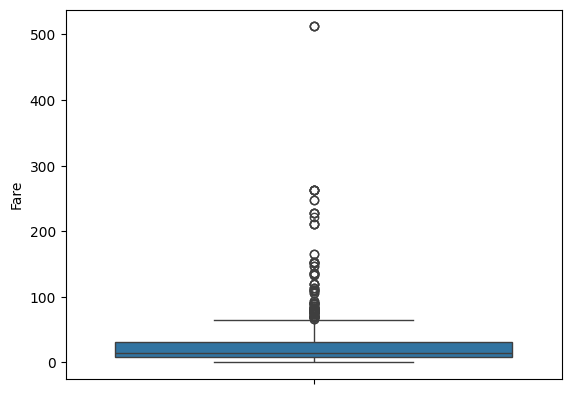

In [30]:
sns.boxplot(dff['Fare'])

<Axes: ylabel='Age'>

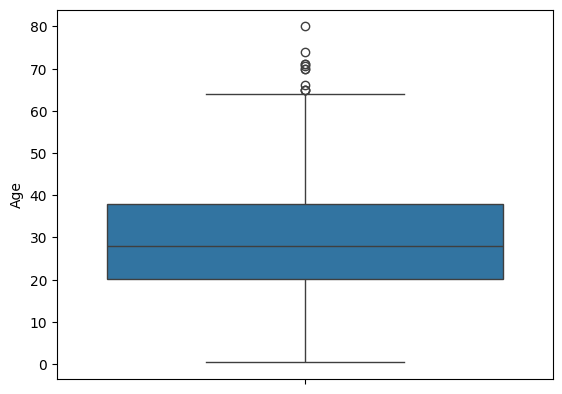

In [31]:
sns.boxplot(dff['Age'])

**Bivariate Analysis**

Text(0.5, 1.0, 'Survival by Sex')

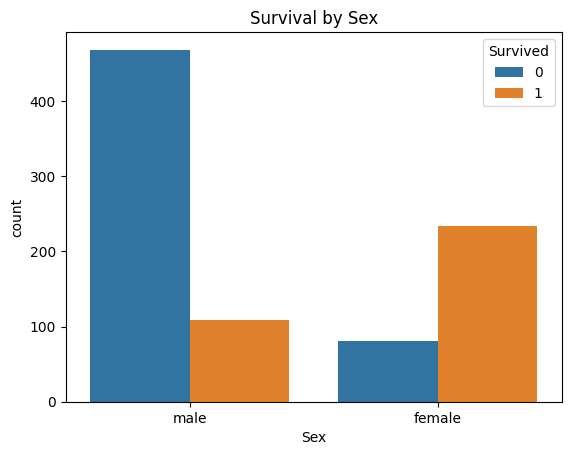

In [33]:
sns.countplot(x='Sex', hue='Survived', data=dff)
plt.title('Survival by Sex')

Text(0.5, 1.0, 'Survival by Passenger Class')

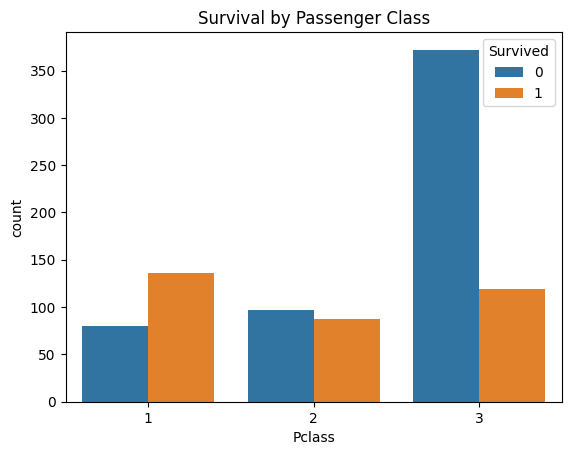

In [39]:
sns.countplot(x='Pclass', hue='Survived', data=dff)
plt.title('Survival by Passenger Class')

Text(0.5, 1.0, 'Age distribution by Survival')

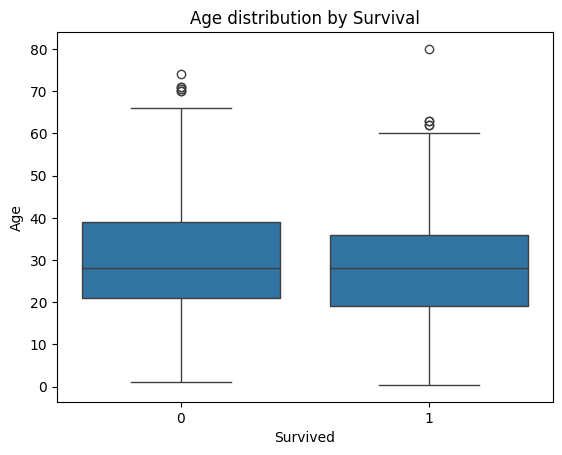

In [34]:
sns.boxplot(x='Survived', y= 'Age', data=dff)
plt.title('Age distribution by Survival')

**Multivariate Analysis**

Text(0.5, 1.0, 'Age distribution by pclass and sex')

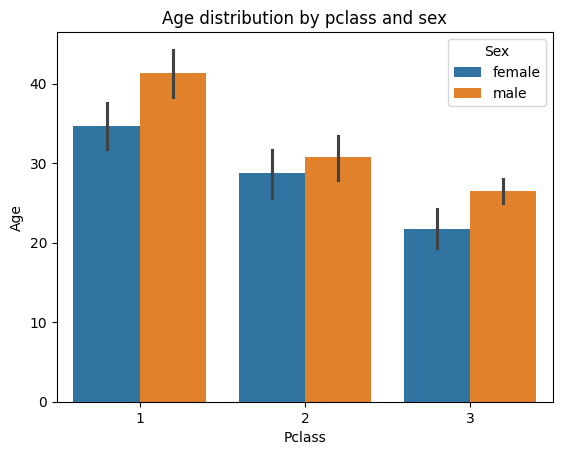

In [37]:
sns.barplot(x= dff['Pclass'], y= dff['Age'], hue= dff['Sex'])
plt.title('Age distribution by pclass and sex')

Text(0.5, 1.0, 'Age distribution by sex and survival')

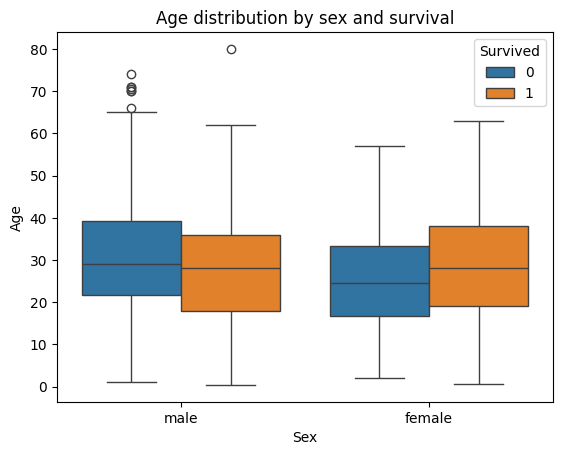

In [41]:
sns.boxplot(x= dff['Sex'], y= dff['Age'], hue= dff['Survived'])
plt.title('Age distribution by sex and survival')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38312\3747628912.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dff[dff['Survived']==0]['Age'], hist=False)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38312\3747628912.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dff[df

<Axes: xlabel='Age', ylabel='Density'>

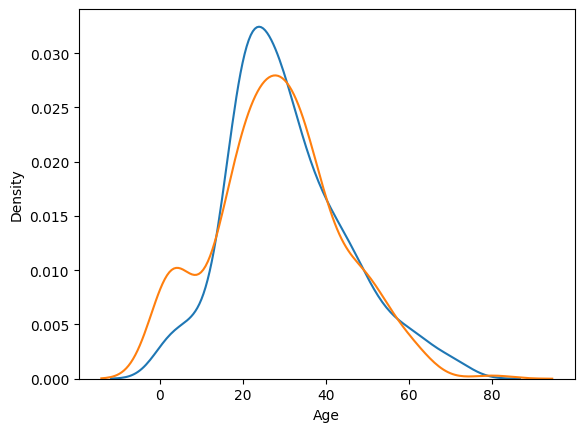

In [47]:
sns.distplot(dff[dff['Survived']==0]['Age'], hist=False) 
sns.distplot(dff[dff['Survived']==1]['Age'], hist=False)

**Correlation Analysis**

<Axes: xlabel='Pclass', ylabel='Survived'>

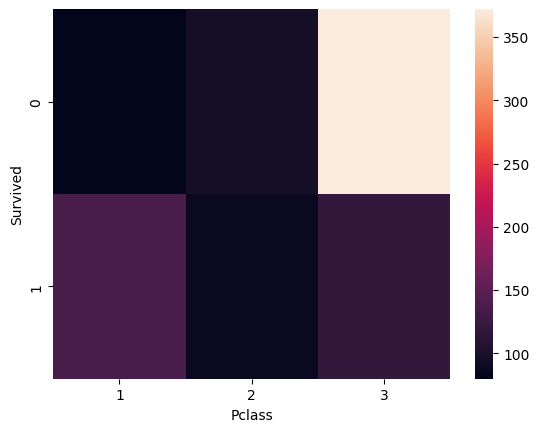

In [48]:
sns.heatmap(pd.crosstab(dff['Survived'], dff['Pclass']))

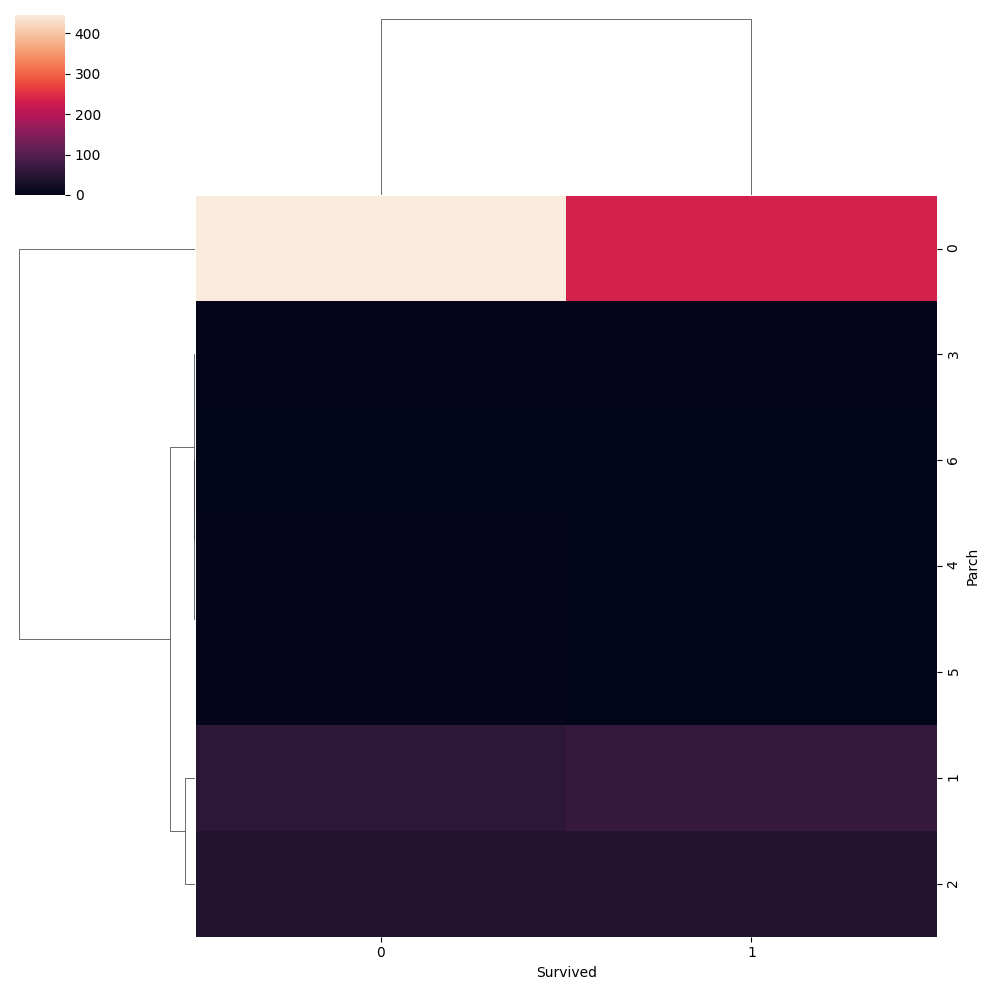

In [50]:
sns.clustermap(pd.crosstab(dff['Parch'], dff['Survived']))

In [51]:
(dff.groupby('Sex')['Survived'].mean()*100)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [52]:
(dff.groupby('Pclass')['Survived'].mean()*100)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

**Handling missing values**

In [54]:
dff.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [92]:
dff['Age'].fillna(dff['Age'].mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38312\2930390684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff['Age'].fillna(dff['Age'].mean(), inplace=True)


In [65]:
dff['Embarked'].fillna(dff['Embarked'].mode()[0], inplace = True)

In [66]:
dff.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [77]:
dff[['Age', 'Fare']] = dff[['Age', 'Fare']].astype(int)

In [78]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Name      891 non-null    object
 3   Sex       891 non-null    object
 4   Age       891 non-null    int32 
 5   SibSp     891 non-null    int64 
 6   Parch     891 non-null    int64 
 7   Fare      891 non-null    int32 
 8   Embarked  891 non-null    object
dtypes: int32(2), int64(4), object(3)
memory usage: 55.8+ KB


**Feature engineering**

In [80]:
dff['FamilySize'] = dff['SibSp'] + dff['Parch'] + 1

In [82]:
dff['IsAlone'] = 0
dff.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [103]:
dff['AgeBand'] = pd.cut(dff['Age'], bins=[0, 12, 18, 35, 60, 80], 
                       labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

In [104]:
dff['FareBand'] = pd.qcut(dff['Fare'], 4, 
                         labels=['Low', 'Mid', 'High', 'VeryHigh'])

In [107]:
dff

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeBand,FareBand
0,0,3,male,22.0,1,0,7.2500,S,2,YoungAdult,Low
1,1,1,female,38.0,1,0,71.2833,C,2,Adult,VeryHigh
2,1,3,female,26.0,0,0,7.9250,S,1,YoungAdult,Mid
3,1,1,female,35.0,1,0,53.1000,S,2,YoungAdult,VeryHigh
4,0,3,male,35.0,0,0,8.0500,S,1,YoungAdult,Mid
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,YoungAdult,Mid
887,1,1,female,19.0,0,0,30.0000,S,1,YoungAdult,High
888,0,3,female,28.0,1,2,23.4500,S,4,YoungAdult,High
889,1,1,male,26.0,0,0,30.0000,C,1,YoungAdult,High


**Encoding Categorical attributes**

In [100]:
encoded_df = pd.get_dummies(dff, columns=['Embarked', 'Sex'], drop_first=True, dtype= int)
encoded_df

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,AgeBand,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,2,YoungAdult,0,1,1
1,1,1,38.0,1,0,71.2833,2,Adult,0,0,0
2,1,3,26.0,0,0,7.9250,1,YoungAdult,0,1,0
3,1,1,35.0,1,0,53.1000,2,YoungAdult,0,1,0
4,0,3,35.0,0,0,8.0500,1,YoungAdult,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,YoungAdult,0,1,1
887,1,1,19.0,0,0,30.0000,1,YoungAdult,0,1,0
888,0,3,28.0,1,2,23.4500,4,NaN,0,1,0
889,1,1,26.0,0,0,30.0000,1,YoungAdult,0,0,1


Insights / Patterns

- Females and 1st Class passengers had the highest survival rates.
- Family presence increased survival odds.
- AgeBand and FareBand showed clear survival patterns.

Conclusion

- EDA revealed that gender, class, and family presence were key survival factors. 
- These insights are crucial for building an accurate predictive model.

In [111]:
#final clean dataset
encoded_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,AgeBand,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,2,YoungAdult,0,1,1
1,1,1,38.0,1,0,71.2833,2,Adult,0,0,0
2,1,3,26.0,0,0,7.9250,1,YoungAdult,0,1,0
3,1,1,35.0,1,0,53.1000,2,YoungAdult,0,1,0
4,0,3,35.0,0,0,8.0500,1,YoungAdult,0,1,1
